# Exercicios para o segundo teste 
*by Juliane Marubayashi
juliane.marubayashi@gmail.com*

Os exercícios são baseados (ou iguais) aos exercícios passados em sala de aula (MIEIC 2st).  

## Gauss

a) Usando o método de gauss, resolva o sistema:  

$$\left\{\begin{matrix}
3x-y+2z = -1\\ 
x+y+z = 8\\ 
2x+0y+z = 5
\end{matrix}\right.$$ 

b) Faça o estudo para a estabilidade externa considerando o erro nos dados de 0,5.   
c) Calcule a estabilidade interna.

In [1]:
# matriz do enunciado

m = [[3, -1, 2, -1],
          [1, 1, 1, 8],
          [2, 0, 1, 5]]

In [2]:
# função para mostrar a matriz

def printMatrix(matrix):
    for line in matrix:
        print(line[0], end='  \t')
        print(line[1], end=' \t')
        print(line[2], end=' | ')
        print(line[3])

printMatrix(m)

3  	-1 	2 | -1
1  	1 	1 | 8
2  	0 	1 | 5


## Alinea a)

Usando o método da eliminação de gauss temos os seguintes valores para X0:

In [3]:
# função para fazer a diagonalização de um sistema linear
def diagonalization(amatrix):
    dimV = len(amatrix)

    # triangularizar a parte de baixo
    for diag in range(dimV):
        aux = amatrix[diag][diag]
        for col in range(dimV + 1):
            amatrix[diag][col] /= aux
        for lin in range(diag + 1, dimV):
            aux2 = amatrix[lin][diag]
            for col in range(diag, dimV + 1):
                amatrix[lin][col] -= amatrix[diag][col] * aux2

    # triangularizar a parte de cima
    for diag in range(dimV - 1, -1, -1):
        for lin in range(diag - 1, -1, -1):
            aux = amatrix[lin][diag]
            for col in range(diag, dimV + 1):
                amatrix[lin][col] -= amatrix[diag][col] * aux

    """
        # no fim teremos uma matriz do tipo:
        
        1     0     0   |  x0
        0     1     0   |  y0
        0     0     1   |  z0
        
        em que a solução é {x0, y0, z0}
    """
    return amatrix

sol0 = diagonalization(m)
printMatrix(sol0)

1.0  	0.0 	0.0 | 4.0
0.0  	1.0 	0.0 | 7.000000000000001
-0.0  	-0.0 	1.0 | -3.0000000000000004


## Resultado:

X0 = {4.0, 7.0, -3.0}

## TODO - ESTABILIDADE EXTERNA E INTERNA


# Gauss-Jacobi e Gauss-Seidel
 
$$\left\{\begin{matrix}
3x+y+z = 7\\ 
x+4y+2z = 4\\ 
2y+5z = 5
\end{matrix}\right.$$

a) Verifique o critério de convergência.  
b) Calcule usando Gauss Jacobi e Gauss Seidel as raízes da equação 


In [4]:
matrixA = [[3,1,1],
           [1,4,2],
           [0,2,5]]
colB = [7,4,5]


    Uma melhor implementação para calculo do residuo em sistemas lineares.
    
    esta implementação requer    
        uma matriz coluna X (solução)  
        uma matriz A  
        uma matriz coluna b  
        
    devolve uma matriz coluna com os valores do residuo  

In [5]:
def residue(sol, originalA, originalb):
    res = [0 for i in sol]
    for i in range(len(originalA)):
        for j in range(len(originalA)):
            res[i] += originalA[i][j] * sol[j]

    return [abs(res[i] - originalb[i]) for i in range(len(sol))]

## Gauss-Jacobi
    
Basicamente é o método de Picard-Peano a regra é definida por recursão:
    
    o novo Xj é dado por:  
    Xj = (b[j] - (A[j][0] * x[0] + A[j][1] * x[1] + A[j][2] * x[2])) / A[j][j]  
    
sendo que j é o indice da linha da matriz

In [6]:
def gaussJacobi(A, b, N=25, x=None, info=True):
    if x is None:
        x = [0 for i in A[0]]

    for i in range(N):
        if info:
            eps = residue(x, A, b)
            print("iteration %i" % i)
            for j in range(len(x)):
                print("x%i: %f\teps%i: %f" % (j, x[j], j, eps[j]))
        
        aux = []
        for j in range(len(A[0])):
            x1 = (b[j] - (A[j][0] * x[0] + A[j][1] * x[1] + A[j][2] * x[2])) / A[j][j]
            aux.append(x1)
        x = [x[i] + aux[i] for i in range(len(x))]



    return x

gaussJacobi(matrixA, colB, N=500, info=False)

[2.0, 0.0, 1.0]

## Gauss-Seidel
    
    Neste caso as novas soluçoes xj são substituidas no calculo de x(j+1)
    
    converge mais rapidamente

In [7]:
def gaussSeidel(A, b, N=25, x=None, info=True):
    if x is None:
        x = [0 for i in A[0]]

    for i in range(N):
        if info:
            eps = residue(x, A, b)
            print("iteration %i" % i)
            for j in range(len(x)):
                print("x%i: %f\teps%i: %f" % (j, x[j], j, eps[j]))
        
        for j in range(len(A[0])):
            x1 = (b[j] - (A[j][0] * x[0] + A[j][1] * x[1] + A[j][2] * x[2])) / A[j][j]
            x[j] += x1

    return x

gaussSeidel(matrixA, colB, N=2000000, info=False)

[2.0, 1.1102230246251565e-16, 1.0]

## Quadratura 

$$ \int_{\pi/2}^{\pi} \frac{sin(x)}{x^2}$$

a) Calcule o integral pelo método dos trapézios e pelo método de simpson para n = 4.   
b) Verifique se o passo usado é adequado (iso implíca calcular o interal numericamente três vezes com três passos de integração diferentes)  
c) Calcule o erro de cada método

In [61]:
from math import sin, pi

def func(x):
    return sin(x)/x**2

def trapRule(x0,x1,f,N=4):
    res = 0
    h = abs(x1-x0)/N
    x = x0 + h
    for i in range(N-1):
        res += f(x)
        x += h
    
    return h * (f(x0) + f(x1) + 2 * res) / 2

print("resultado:", trapRule(pi/2,pi,func))
    

resultado: 0.24358830147057203


In [64]:
from math import sqrt

def convergenceQuotientInt(x0, x1, f, N, method):
    s0 = method(x0, x1, f, N)
    s1 = method(x0, x1, f, N * 2)
    s2 = method(x0, x1, f, N * 4)

    order = round((s1 - s0) / (s2 - s1))
    print("Ordem:", sqrt(order))
    
    return (s2 - s1) / (order - 1)

print("Erro:", convergenceQuotientInt(pi/2,pi,func, 4, trapRule))

Ordem: 2.0
Erro: -0.00033252413700863664


In [65]:
def simpson(x0, x1, f, N=4):
    res = 0
    N *= 2
    h = abs((x1 - x0) / N)
    x = x0 + h

    for i in range(1, N, 2):
        res += 4 * f(x)
        x += h * 2

    x = x0 + 2 * h

    for i in range(2, N, 2):
        res += 2 * f(x)
        x += h * 2

    return h * (f(x0) + f(x1) + res) / 3

print("Resultado:",simpson(pi/2,pi,func))

Resultado: 0.23829400365910458


In [66]:
print("Erro:", convergenceQuotientInt(pi/2,pi,func, 4, simpson))

Ordem: 4.0
Erro: -2.8022554817338138e-08


### Discussão de Resultados

Com a regra dos trapézios obtemos um QC de aproximadamente 4, o que é "bom", com um erro de cerca de 0.00033
Com a regra de simpson obtemos um QC de aproximadamente 16, o que é "bom", com um erro bem menor, de cerca de 2.8e-8

O passo usado foi adequado uma vez que os quocientes de convergencia atingiram o suposto.

## Equações diferenciais

$$\left\{\begin{matrix}  
y' = \frac{\mathrm{d}y}{\mathrm{d}x}\\   
y' = x^2+ y^2  
\end{matrix}\right.$$  

a) Calcule a forma da curva da equação diferencial, considerando x0 = 0, y0= 0 e h= 1, no intervalo [0, 1.4]. Deves usar euler, RK2 e RK4.   
b) Verifique se o passo é adequado em cada um dos métodos.   
c) Calcule o erro dos métodos.   

Text(0.5, 1.0, "Euler's method (h=0.100)")

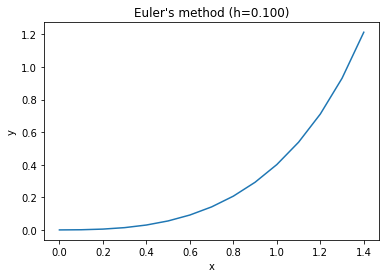

In [67]:
def func(x,y):
    return x**2 + y**2


def euler(deltaxn, f, x, y, bound):
    y_list = [0]
    x_list = [0]
    while x <= bound:
        x += deltaxn
        y += deltaxn * f(x,y)
        y_list.append(y)
        x_list.append(x)
    return (x_list, y_list)

import matplotlib.pyplot as plt

h = 0.1
(x,y) = euler(h,func,0,0,1.4)

plt.plot(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.title("Euler's method (h=%.03f)" % h)

Text(0.5, 1.0, "RK2's method (h=0.100)")

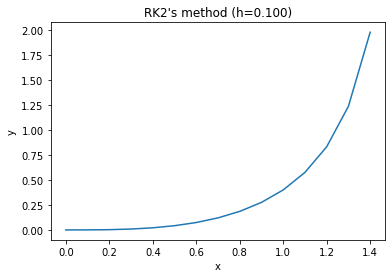

In [68]:
def rungeKuta2(deltax, f, x, y, bound):
    y_list = [0]
    x_list = [0]
    h = (x+bound)/2.0
    
    while x <= bound:
        yln=f(x,y)
        deltay=f(x+deltax/2.0, y+h*yln/2.0)*deltax
        x += deltax
        y += deltay
        x_list.append(x)
        y_list.append(y)
        
    return (x_list, y_list)
        
    
h = 0.1
(x,y) = rungeKuta2(h,func ,0,0,1.4)
    
plt.plot(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.title("RK2's method (h=%.03f)" % h)

Text(0.5, 1.0, "RK4's method (h=0.100)")

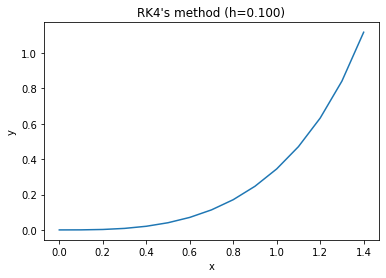

In [69]:
def rungeKuta4(deltax, f, x, y, bound):
    y_list = [0]
    x_list = [0]
    h = (x+bound)/2.0
    
    while x <= bound:
        sigma1 = deltax*f(x,y)
        sigma2 = deltax*f(x+deltax/2.0, y+sigma1/2.0)
        sigma3 = deltax*f(x+deltax*h/2.0, y+sigma2/2.0)
        sigma4 = deltax*f(x+deltax, y+sigma3)
        
        x += deltax
        y += (sigma1+2.0*sigma2+2.0*sigma3+sigma4)/6.0
        
        x_list.append(x)
        y_list.append(y)
        
    return (x_list, y_list)
        
    
h = 0.1
(x,y) = rungeKuta4(h,func,0,0,1.4)
    
plt.plot(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.title("RK4's method (h=%.03f)" % h)
        

## TODO - QUOCIENTE DE CONVERGENCIA PARA ED'S E CALCULO DE ERROS (TIRAR DUVIDA NA AULA)